In [5]:
from glob import glob
import seaborn as sns
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import sys

In [8]:
if sys.platform == 'darwin':
    kws_globstr = "/Users/markjos/projects/malachor5/data/kws/*.json"
else:
    kws_globstr = r"C:\projects\malachor5\data\keyword_search\tira_eval_kws\*.json"
kws_files = glob(kws_globstr)
kws_files

['/Users/markjos/projects/malachor5/data/kws/HH20220327-2-0_1sec.json',
 '/Users/markjos/projects/malachor5/data/kws/HH20220327-2-2sec.json',
 '/Users/markjos/projects/malachor5/data/kws/HH20210913-2sec.json',
 '/Users/markjos/projects/malachor5/data/kws/HH20220327-2-0_25sec.json',
 '/Users/markjos/projects/malachor5/data/kws/HH20210312-2sec.json',
 '/Users/markjos/projects/malachor5/data/kws/HH20210913-1sec.json',
 '/Users/markjos/projects/malachor5/data/kws/HH20220327-2-1sec.json',
 '/Users/markjos/projects/malachor5/data/kws/HH20210312-1sec.json',
 '/Users/markjos/projects/malachor5/data/kws/HH20210913-0_1sec.json',
 '/Users/markjos/projects/malachor5/data/kws/HH20210312-0_5sec.json',
 '/Users/markjos/projects/malachor5/data/kws/HH20210913-0_25sec.json',
 '/Users/markjos/projects/malachor5/data/kws/HH20210312-0_1sec.json',
 '/Users/markjos/projects/malachor5/data/kws/HH20210913-0_5sec.json',
 '/Users/markjos/projects/malachor5/data/kws/HH20220327-2-0_5sec.json',
 '/Users/markjos/pro

In [19]:
rows = []
for kws_path in kws_files:
    kws_basename = os.path.basename(kws_path)
    kws_stem = kws_basename.split('-')[0]
    window_len = float(kws_basename.split('-')[-1].removesuffix('sec.json').replace('_', '.'))
    with open(kws_path, encoding='utf8') as f:
        kws_obj=json.load(f)
    metrics = kws_obj['metrics']
    for metric in metrics:
        rows.append({
            "source": kws_stem,
            "window_len": window_len,
            "eer": metric['eer'],
            "eer_threshold": metric['eer_threshold'],
            "eer_windowed": metric.get('eer_windowed', None),
            "eer_threshold_windowed": metric.get('eer_threshold_windowed', None),
            "lr_eer": metric['lr_eer'],
            "lr_eer_threshold": metric['lr_eer_threshold'],
            "lr_beta1": metric["lr_params"]["lr_coefficients"][0][0],
            "lr_beta2": metric["lr_params"]["lr_coefficients"][0][1],
            "lr_intercept": metric["lr_params"]["lr_intercept"],
            "keyword": metric["keyword"]
        })
df = pd.DataFrame(rows)
df['keyword_len']=df['keyword'].str.len()
df.head()

,source,window_len,eer,eer_threshold,eer_windowed,eer_threshold_windowed,lr_eer,lr_eer_threshold,lr_beta1,lr_beta2,lr_intercept,keyword,keyword_len
0,HH20220327,0.1,0.461222,0.260328,0.287719,0.301314,0.750000,0.000180,-1.321190,-3.332098,-6.204748,lòɽgà,7
1,HH20220327,0.1,0.333333,0.087645,0.500000,0.127757,0.500000,0.000167,-0.367947,-3.497826,-6.541700,lùbó,6
2,HH20220327,0.1,0.380952,0.044008,0.666667,0.076883,0.531531,0.000433,-0.096250,-3.292950,-5.736435,jìgèɲɔ́,9
3,HH20220327,0.1,0.388060,0.265793,0.464151,0.308591,0.537313,0.001088,-1.058541,-2.842336,-4.820458,ɔ́ndì,6
4,HH20220327,0.1,0.525239,0.065395,0.335664,0.108205,0.666667,0.000197,-0.298923,-3.418460,-6.401936,cícə̀lò,9


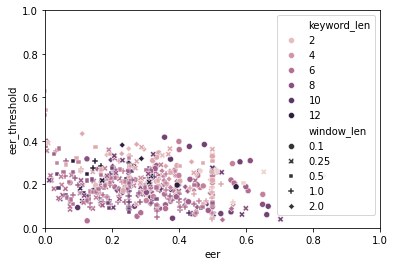

In [20]:
fig=sns.scatterplot(df, x='eer', y='eer_threshold', hue='keyword_len', style="window_len")
fig.set(ylim=(0,1), xlim=(0,1))
# for _, row in df.iterrows():
    # plt.text(row['eer'], row['eer_threshold'], row['keyword'])
plt.show()

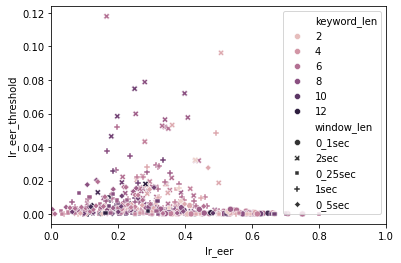

In [12]:
fig=sns.scatterplot(df, x='lr_eer', y='lr_eer_threshold', hue='keyword_len', style="window_len")
fig.set(xlim=(0,1))
plt.show()

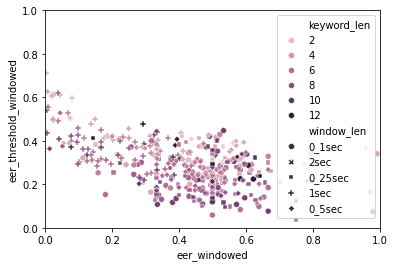

In [13]:
fig=sns.scatterplot(df, x='eer_windowed', y='eer_threshold_windowed', hue='keyword_len', style="window_len")
fig.set(ylim=(0,1), xlim=(0,1))
# for _, row in df.iterrows():
    # plt.text(row['eer'], row['eer_threshold'], row['keyword'])
plt.show()

In [24]:
df.pivot_table(index='window_len', values=['eer'], aggfunc='mean')

,eer
window_len,
0.10,0.396432
0.25,0.241189
0.50,0.207335
1.00,0.299912
2.00,0.338059


In [ ]:
df=df.sort_values()
for window_len in df['window_len'].unique():
    window_len_mask = df['window_len']==window_len
    print(
        window_len +'\n',
        df.loc[window_len_mask,['keyword_len', 'eer', 'eer_threshold']].corr('spearman')
    )

0_1sec
                keyword_len       eer  eer_threshold
keyword_len       1.000000  0.046494      -0.162553
eer               0.046494  1.000000       0.065731
eer_threshold    -0.162553  0.065731       1.000000
2sec
                keyword_len       eer  eer_threshold
keyword_len       1.000000 -0.286889      -0.323603
eer              -0.286889  1.000000      -0.426299
eer_threshold    -0.323603 -0.426299       1.000000
0_25sec
                keyword_len       eer  eer_threshold
keyword_len       1.000000 -0.031515      -0.363281
eer              -0.031515  1.000000       0.169534
eer_threshold    -0.363281  0.169534       1.000000
1sec
                keyword_len       eer  eer_threshold
keyword_len       1.000000 -0.420315      -0.100179
eer              -0.420315  1.000000      -0.369343
eer_threshold    -0.100179 -0.369343       1.000000
0_5sec
                keyword_len       eer  eer_threshold
keyword_len       1.000000 -0.125368      -0.358668
eer              -0.125368 

In [82]:
df.loc[df['window_len']=='2sec',['keyword_len', 'eer', 'eer_threshold']].corr('spearman')

,keyword_len,eer,eer_threshold
keyword_len,1.000000,-0.286889,-0.323603
eer,-0.286889,1.000000,-0.426299
eer_threshold,-0.323603,-0.426299,1.000000
